In [1]:
import glob
import pandas as pd 
import numpy as np
import h5py
import hdf5plugin
import ray
import pickle
import multiprocessing
from functools import partial
import matplotlib.pyplot as plt
import os, sys

from collections import Counter
from scipy.interpolate import interp1d


sys.path.append(os.getcwd()+'/../../../../public/cds-backend/code/')
import cds_eua4 as eua

!module load odc
import pyodc
import codc

/srvfs/home/uvoggenberger/micromamba/envs/uv12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-19 09:30:05,863	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


no config found
Loading odc/1.4.5-gcc-11.3.0-avoxopw
  Loading requirement: openmpi/4.0.5-gcc-11.3.0-pob76hu
    eckit/1.24.4-gcc-11.3.0-jxjc4by
>

ImportError: 

In [6]:
def find_closest_date(dates, target):
    return dates.loc[(dates - target).abs().idxmin()]


In [4]:
cfile = '/mnt/users/scratch/uvoggenberger/intercomparisons/0-20100-0-01901_CEUAS_merged_v1.nc'
cdmfile = eua.CDMDataset(cfile)
np.unique(cdmfile.header_table.height_of_station_above_sea_level[:])
cdmfile.observations_table.latitude[-1], cdmfile.observations_table.longitude[-1]

(-20.2972, 57.49692)

In [ ]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/igra2/0-20001-0-11035/0-20001-0-11035_1985_igra2_harvested_AUM00011035-data.txt.nc'
cdmfile = eua.CDMDataset(cfile)
np.unique(cdmfile.header_table.height_of_station_above_sea_level[:])

array([nan], dtype=float32)

In [42]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/ncar/0-20001-0-11035/0-20001-0-11035_1985_ncar_harvested_uadb_trhc_11035.txt.nc'
cdmfile = eua.CDMDataset(cfile)
np.unique(cdmfile.header_table.height_of_station_above_sea_level[:])

array([nan], dtype=float32)

In [34]:
cfile = '/mnt/users/scratch/leo/scratch/converted_v29/long/0-20001-0-11035_CEUAS_merged_v3.nc'
cdmfile = eua.CDMDataset(cfile)
print(np.unique(cdmfile.header_table.source_id[:], axis=0))
np.unique(cdmfile.header_table.height_of_station_above_sea_level[:])

[[b'e' b'r' b'a' b'5' b'_' b'1' b'' b'' b'' b'']
 [b'e' b'r' b'a' b'5' b'_' b'2' b'' b'' b'' b'']
 [b'f' b'i' b'x' b'e' b'd' b'g' b'i' b'u' b'b' b'']
 [b'i' b'g' b'r' b'a' b'2' b'' b'' b'' b'' b'']
 [b'n' b'c' b'a' b'r' b'' b'' b'' b'' b'' b'']]


array([152.80000305])

In [9]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_mobile/shipsound/0-20999-0-ship7696sound/0-20999-0-ship7696sound_1992_shipsound_harvested_shipsound7696.csv.nc'
cdmfile = eua.CDMDataset(cfile)
cdmfile.header_table.height_of_station_above_sea_level[:]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [3]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_mobile/shipsound/0-20999-0-ship7696sound/0-20999-0-ship7696sound_1986_shipsound_harvested_shipsound7696.csv.nc'
cdmfile = eua.CDMDataset(cfile)
# display(cdmfile.station_configuration.secondary_id[:])
# df = cdmfile.to_dataframe(groups = ['observations_table', 'era5fb'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'z_coordinate_type','latitude', 'longitude', 'sensor_id', 'observation_height_above_station_surface', 'reportype']) # 
# df

In [18]:
cdmfile.observations_table

observations_table:

adjustment_id_____________________________________ : : (280692, 20)
advanced_assimilation_feedback____________________ : : (280692,)
advanced_homogenisation___________________________ : : (280692,)
advanced_qc_______________________________________ : : (280692,)
advanced_uncertainty______________________________ : : (280692,)
bbox_max_latitude_________________________________ : : (280692,)
bbox_max_longitude________________________________ : : (280692,)
bbox_min_latitude_________________________________ : : (280692,)
bbox_min_longitude________________________________ : : (280692,)
code_table________________________________________ : : (280692,)
conversion_flag___________________________________ : : (280692,)
conversion_method_________________________________ : : (280692,)
crs_______________________________________________ : : (280692,)
data_policy_licence_______________________________ : : (280692,)
date_time_________________________________________ : : (280692,)
d

In [9]:
cdmfile.observations_table

observations_table:

adjustment_id_____________________________________ : : (73732, 20)
advanced_assimilation_feedback____________________ : : (73732,)
advanced_homogenisation___________________________ : : (73732,)
advanced_qc_______________________________________ : : (73732,)
advanced_uncertainty______________________________ : : (73732,)
bbox_max_latitude_________________________________ : : (73732,)
bbox_max_longitude________________________________ : : (73732,)
bbox_min_latitude_________________________________ : : (73732,)
bbox_min_longitude________________________________ : : (73732,)
code_table________________________________________ : : (73732,)
conversion_flag___________________________________ : : (73732,)
conversion_method_________________________________ : : (73732,)
crs_______________________________________________ : : (73732,)
data_policy_licence_______________________________ : : (73732,)
date_time_________________________________________ : : (73732,)
date_time_meanin

In [12]:
# sel_dt = '195001'
# sel_statid = '94120'

# # Loading data from the era5 file:

# bg_files = glob.glob('/mnt/users/scratch/leo/scratch/era5/odbs/2/*'+sel_dt+'*'+sel_statid+'')[0]
# df_decoded = codc.read_odb(bg_files, single=True)
# subset = df_decoded[['vertco_type@body', 'vertco_reference_1@body', 'andate', 'antime', 'obsvalue@body', 'varno@body', 'fg_depar@body', 'biascorr@body']]
# temp_data = subset[subset['varno@body'] == 2]
# z_data = subset[subset['varno@body'] == 1]
# z_data = z_data[['vertco_reference_1@body', 'andate', 'antime', 'obsvalue@body']]
# z_data.rename(columns={'obsvalue@body': 'gpm'}, inplace=True)
# temp_data['temp_final'] = temp_data['obsvalue@body'] - temp_data['fg_depar@body'] - temp_data['biascorr@body']
# era_df = temp_data.merge(z_data, on=['vertco_reference_1@body', 'andate', 'antime'])

# # Loading data from the converted file:

# cfile = glob.glob('/mnt/users/scratch/leo/scratch/converted_v25/long/*'+sel_statid+'*.nc')[0]
# cdmfile = eua.CDMDataset(cfile)
# df = cdmfile.to_dataframe(groups = ['observations_table'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate'])
# df_cuon = df[df.observed_variable == 117]

In [121]:
# @ray.remote
def find_pilot(file):
    with h5py.File(file) as fl:
        # sid = fl['header_table']['source_id'][:]
        x = np.unique(fl['era5fb']['reportype'][:])
        if 16068 in x or 16013 in x:
            print(x, file)
    # keys, values = np.unique([''.join(row.astype(str)) for row in sid], return_counts=True)
    # return dict(zip(keys, values))

# pool = multiprocessing.Pool(processes=40)
# year_counts = []


for year in range(1985,2025,1):
    print(year)
    files = glob.glob('/mnt/users/scratch/leo/scratch/converted_v29/'+str(year)+'/*.nc')
    for i in files:
        find_pilot(i)
    # result_list = list(pool.map(get_source_count, files[:]))

    # total_counts = Counter()
    # for d in result_list:
    #     total_counts.update(d)

    # year_counts.append(total_counts)

    # print(total_counts)
    break

# with open('20250205_stored_data_station_sources_1900_to_2024.p', 'wb') as file:
#         pickle.dump(year_counts, file)

1985
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-02260_CEUAS_merged_v3.nc
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-03707_CEUAS_merged_v3.nc
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-02520_CEUAS_merged_v3.nc
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-03266_CEUAS_merged_v3.nc
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-03882_CEUAS_merged_v3.nc
[-2147483648       16013       16022] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-04213_CEUAS_merged_v3.nc
[-2147483648       16013       16022] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-03768_CEUAS_merged_v3.nc
[16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-06073_CEUAS_merged_v3.nc
[-2147483648       16013] /mnt/users/scratch/leo/scratch/converted_v29/1985/0-20000-0-06060_CEUAS_mer

In [10]:
file = '/mnt/users/scratch/leo/scratch/converted_v27/1985/0-20000-0-94120_CEUAS_merged_v3.nc'
with h5py.File(file, 'r') as fl:
    mask = fl['era5fb']['reportype'][:] == 16013
    mask_wd = np.logical_and(mask, fl['observations_table']['observed_variable'][:] == 117)
    mask_ws = np.logical_and(mask, fl['observations_table']['observed_variable'][:] == 107)
    print(np.unique(fl['observations_table']['observed_variable'][mask_wd]))
    print(fl['observations_table']['z_coordinate'][mask_wd])
    print(fl['era5fb']['vertco_reference_1@body'][mask_wd])
    print(fl['era5fb'].keys())

[117]
[ 9522.489 13900.443 60069.83  ... 78530.45  90972.125 94330.805]
[ 9522.489 13900.443 60069.83  ... 78530.45  90972.125 94330.805]
<KeysViewHDF5 ['albedo@modsurf', 'an_depar@body', 'an_depar@surfbody_feedback', 'an_sens_obs@body', 'andate', 'antime', 'biascorr@body', 'biascorr_fg@body', 'bufrtype@hdr', 'class', 'codetype@hdr', 'collection_identifier@conv', 'date@hdr', 'datum_anflag@body', 'datum_event1@body', 'datum_rdbflag@body', 'datum_sfc_event@surfbody_feedback', 'datum_status@body', 'datum_status@surfbody_feedback', 'eda_spread@errstat', 'entryno@body', 'expver', 'fg_depar@body', 'fg_depar@offline', 'fg_depar@surfbody_feedback', 'fg_error@errstat', 'final_obs_error@errstat', 'groupid@hdr', 'index', 'lat@hdr', 'lon@hdr', 'lsm@modsurf', 'lsm@surfbody_feedback', 'numtsl@desc', 'obs_error@errstat', 'obstype@hdr', 'obsvalue@body', 'orography@modsurf', 'ppcode@conv_body', 'qc_pge@body', 'report_event1@hdr', 'report_rdbflag@hdr', 'report_status@hdr', 'reportype', 'seaice@modsurf',

In [114]:
cfile = '/mnt/users/scratch/leo/scratch/converted_v27/1985/0-20000-0-94120_CEUAS_merged_v3.nc'
cdmfile = eua.CDMDataset(cfile)
# display(cdmfile.station_configuration.secondary_id[:])
df = cdmfile.to_dataframe(groups = ['observations_table', 'era5fb'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'z_coordinate_type','latitude', 'longitude', 'sensor_id', 'observation_height_above_station_surface', 'reportype']) # 
df

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type,latitude,longitude,sensor_id,observation_height_above_station_surface,reportype
0,1985-01-01 00:00:00,3.000000e+01,34,20000.0,1,-12.4,130.869995,APCa,NaN,-2147483648
1,1985-01-01 00:00:00,3.000000e+01,34,25000.0,1,-12.4,130.869995,APCa,NaN,-2147483648
2,1985-01-01 00:00:00,3.000000e+01,34,30000.0,1,-12.4,130.869995,APCa,NaN,-2147483648
3,1985-01-01 00:00:00,1.700000e+01,34,30200.0,1,-12.4,130.869995,APCa,NaN,-2147483648
4,1985-01-01 00:00:00,2.000000e+01,34,36700.0,1,-12.4,130.869995,APCa,NaN,-2147483648
...,...,...,...,...,...,...,...,...,...,...
242914,1985-12-31 16:00:00,-3.985283e+00,140,30000.0,1,-12.4,130.869995,APCa,NaN,16022
242915,1985-12-31 16:00:00,-4.416539e+00,140,40000.0,1,-12.4,130.869995,APCa,NaN,16022
242916,1985-12-31 16:00:00,-3.000000e-16,140,50000.0,1,-12.4,130.869995,APCa,NaN,16022
242917,1985-12-31 16:00:00,3.676955e+00,140,70000.0,1,-12.4,130.869995,APCa,NaN,16022


In [115]:
# df['date_time'] = pd.to_datetime(df['date_time'])

rs_df = df[df.reportype == 16022]
pilot_df = df[df.reportype == 16013]

In [116]:
rs_df = rs_df[rs_df.observed_variable == 117]
pilot_df = pilot_df[pilot_df.observed_variable == 117]

In [119]:
pilot_df[pilot_df.date_time == '1985-01-29 00:00:00']

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type,latitude,longitude,sensor_id,observation_height_above_station_surface,reportype
99283,1985-01-29,161810.0,117,9522.489258,1,-12.4,130.869995,APCa,NaN,16013
99287,1985-01-29,144160.0,117,12645.157227,1,-12.4,130.869995,APCa,NaN,16013
99291,1985-01-29,114740.0,117,20287.898438,1,-12.4,130.869995,APCa,NaN,16013
99306,1985-01-29,41190.0,117,60069.828125,1,-12.4,130.869995,APCa,NaN,16013
99309,1985-01-29,35300.0,117,64944.601562,1,-12.4,130.869995,APCa,NaN,16013
99313,1985-01-29,20590.0,117,78530.453125,1,-12.4,130.869995,APCa,NaN,16013
99318,1985-01-29,8830.0,117,90972.125000,1,-12.4,130.869995,APCa,NaN,16013
99321,1985-01-29,5880.0,117,94330.804688,1,-12.4,130.869995,APCa,NaN,16013


In [118]:
rs_df

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type,latitude,longitude,sensor_id,observation_height_above_station_surface,reportype
96767,1985-01-01 00:00:00,161910.0,117,10000.0,1,-12.40,130.869995,APCa,NaN,16022
96771,1985-01-01 00:00:00,139150.0,117,15000.0,1,-12.40,130.869995,APCa,NaN,16022
96773,1985-01-01 00:00:00,121700.0,117,20000.0,1,-12.40,130.869995,APCa,NaN,16022
96774,1985-01-01 00:00:00,107180.0,117,25000.0,1,-12.40,130.869995,APCa,NaN,16022
96775,1985-01-01 00:00:00,94730.0,117,30000.0,1,-12.40,130.869995,APCa,NaN,16022
...,...,...,...,...,...,...,...,...,...,...
128415,1985-12-31 10:00:00,41840.0,117,59530.0,1,-12.43,130.869995,APCa,NaN,16022
128416,1985-12-31 10:00:00,35860.0,117,64450.0,1,-12.43,130.869995,APCa,NaN,16022
128418,1985-12-31 10:00:00,20920.0,117,78190.0,1,-12.43,130.869995,APCa,NaN,16022
128420,1985-12-31 10:00:00,8960.0,117,90820.0,1,-12.43,130.869995,APCa,NaN,16022


In [103]:
plevs = np.asarray([10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 850, 925, 1000]) * 100
diffs = {}
for i in plevs:
    diffs[i]= []
z_for_diff = []
gp_diff = []

for year in [1985]:
    for month in range(1,13):
        for day in range(1,32):
            try:
                # rs_day = rs_df[rs_df.date_time == str(year) + '-' + str(month) + '-' + str(day)]
                pilot_day = pilot_df[np.logical_and(pilot_df.date_time >= pd.to_datetime(f"{year}-{month}-{day} 00:00:00") , (pilot_df.date_time <= pd.to_datetime(f"{year}-{month}-{day} 23:59:59")))]
                for i in pilot_day.date_time.drop_duplicates():
                    pilot_asc = pilot_day[pilot_day.date_time == i]

                    # pilot_day = pilot_df[pilot_df.date_time.dt.date == pd.to_datetime(str(year) + '-' + str(month) + '-' + str(day)).date() ]
                    best_match = pd.merge_asof(pilot_asc, rs_df, on='date_time', direction='nearest', tolerance=pd.Timedelta('12H'))
                    rs_match = rs_df[rs_df.date_time == best_match.date_time.iloc[0]]
                    pilot_asc["date_time"] = pilot_asc["date_time"].dt.strftime("%Y-%m-%d %H:%M:%S")
                    rs_match["date_time"] = rs_match["date_time"].dt.strftime("%Y-%m-%d %H:%M:%S")
                    if len(rs_match) != 0 and len(pilot_asc) != 0:
                        z_pilot = np.array(pilot_asc.z_coordinate)
                        gp_pilot = np.array(pilot_asc.observation_value)
                        z_rs = np.array(rs_match.z_coordinate)
                        gp_rs = np.array(rs_match.observation_value)
                        calc_gp_rs_to_pilot = np.interp(z_pilot, z_rs, gp_rs)

                        z_for_diff.extend(list(z_pilot))
                        gp_diff.extend(list(gp_pilot - calc_gp_rs_to_pilot))
            except:
                pass


/tmp/ipykernel_1496625/2460060984.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  best_match = pd.merge_asof(pilot_asc, rs_df, on='date_time', direction='nearest', tolerance=pd.Timedelta('12H'))
/tmp/ipykernel_1496625/2460060984.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_match["date_time"] = rs_match["date_time"].dt.strftime("%Y-%m-%d %H:%M:%S")


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/srvfs/home/uvoggenberger/.conda/envs/uvn10/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/srvfs/home/uvoggenberger/.conda/envs/uvn10/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt
/tmp/ipykernel_1496625/2460060984.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  best_match = pd.merge_asof(pilot_asc, rs_df, on='date_time', direction='nearest', tolerance=pd.Timedelta('12H'))
/tmp/ipykernel_1496625/24600

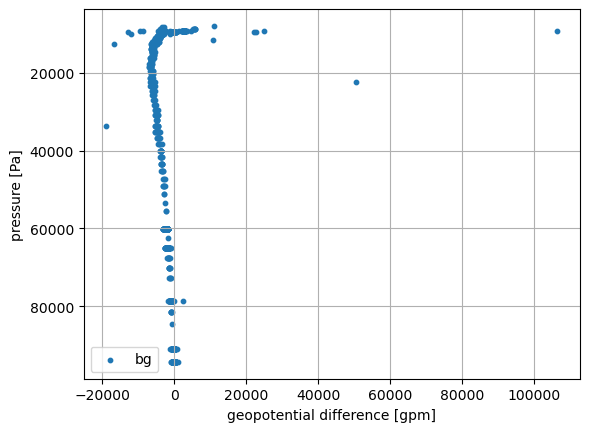

In [112]:

plt.scatter(gp_diff, z_for_diff, 10, label='bg')
plt.ylabel("pressure [Pa]")
plt.xlabel("geopotential difference [gpm]")

plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.show()
plt.close()

In [113]:
gp_diff

[4610.0,
 -1270.0,
 -4343.938056640618,
 -1882.201943108972,
 -1634.3266250000015,
 -918.2087803171635,
 -123.77899159663866,
 64.7519432773106,
 -1180.0,
 -2102.4472790948275,
 -1727.11627604167,
 -1098.3546195652161,
 -90.89999999999964,
 66.52433307926822,
 2550.0,
 -3330.0,
 -6410.058945312514,
 -2100.9811053240774,
 -1761.3429418103478,
 -1008.0069065126045,
 -182.6833333333343,
 2.084375000000364,
 -390.0,
 -5951.63147460937,
 -2042.282935049021,
 -1688.2093261718765,
 -849.878492647058,
 -221.61481481481496,
 12.911111111110586,
 -590.0,
 -2173.418397887326,
 -1346.177734375,
 -969.6035416666673,
 -261.73049999999967,
 -47.286937040441444,
 2840.0,
 -6491.610898437502,
 -2100.259323770493,
 -1771.9214788732424,
 -965.7196875000009,
 -195.99450757575687,
 -47.1654352678579,
 100.0,
 -3667.6100156249886,
 -5695.729697265633,
 -1973.6257291666698,
 -1685.7347656249985,
 -1040.2409374999988,
 -108.03846153846098,
 42.28125,
 0.0,
 -4948.985937499994,
 -6439.471132812498,
 -1879.2234

In [95]:
def p_to_z_ifs(p): # pressure (hPa) to geopotential height (m^/s^2) 
    a = 5.252368255329
    b = 44330.769230769
    c = 0.000157583169442
    ptro = 226.547172
    po = 1013.25
    g = 9.80665
 
    if p != p:

        h = p

    elif p < 226.5:
        
        y = np.log(p/ptro)

        h = y /(-c) + 11000.

    else:
        
        y = (p / po) ** (1. / a)
        
        h = (y - 1) * (-b)


    h *= g
    return h

In [86]:
p_to_z_ifs(709.64726562)/9.80665

2986.7328232066775

In [87]:
cfile = '/mnt/users/scratch/leo/scratch/converted_v27/1950/0-20000-0-10868_CEUAS_merged_v3.nc' #'/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/era5_2/0-20000-0-94120/0-20000-0-94120_1950_era5_2_harvested_era5.conv._1:94120.gz.nc'
cdmfile = eua.CDMDataset(cfile)
df = cdmfile.to_dataframe(groups = ['observations_table', 'era5fb'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'reportype', 'vertco_reference_1@body', 'vertco_type@body'])
df_all = df
df = df[df.reportype == 16013]
df

,date_time,observation_value,observed_variable,z_coordinate,reportype,vertco_reference_1@body,vertco_type@body
36576,1950-01-01 08:30:00,22.000000,106,61870.878906,16013,61870.878906,1
36577,1950-01-01 08:30:00,25.200001,106,63945.296875,16013,63945.296875,1
36578,1950-01-01 08:30:00,29.600000,106,66075.835938,16013,66075.835938,1
36579,1950-01-01 08:30:00,35.799999,106,68260.171875,16013,68260.171875,1
36581,1950-01-01 08:30:00,45.000000,106,70497.945312,16013,70497.945312,1
...,...,...,...,...,...,...,...
330384,1950-12-31 20:30:00,0.000000,140,73386.929688,16013,73386.929688,1
330386,1950-12-31 20:30:00,0.000000,140,78308.148438,16013,78308.148438,1
330388,1950-12-31 20:30:00,0.000000,140,83491.789062,16013,83491.789062,1
330390,1950-12-31 20:30:00,0.000000,140,88960.304688,16013,88960.304688,1


In [92]:
def pressure_to_height(pressure, p0=101325, T0=288.15, R_d=287.06, g=9.80665):
    """
    Convert pressure (Pa) to height (m) using the IFS standard atmosphere formula.
    
    Parameters:
        pressure (float or array-like): Pressure in Pascals.
        p0 (float): Reference pressure at sea level (default 101325 Pa).
        T0 (float): Standard temperature at sea level (default 288.15 K).
        R_d (float): Specific gas constant for dry air (default 287.06 J/(kg·K)).
        g (float): Gravitational acceleration (default 9.80665 m/s²).
    
    Returns:
        float or np.ndarray: Corresponding height(s) in meters.
    """
    return (R_d * T0 / g) * np.log(p0 / np.array(pressure))

In [96]:
a = list(df.z_coordinate[-10:])
print(a)
print([p_to_z_ifs(i/100)/9.80665 for i in a])
print(list(pressure_to_height(a)))

[62146.0, 64276.06640625, 66463.0546875, 68713.8125, 71021.109375, 73386.9296875, 78308.1484375, 83491.7890625, 88960.3046875, 100861.265625]
[3939.755618876482, 3679.760633741034, 3419.977125671686, 3159.747431961202, 2900.0482347509383, 2640.7604748307044, 2122.382466627354, 1604.14191554838, 1084.9289112441372, 38.69981256883752]
[4123.2847880075815, 3839.02725387996, 3556.810993559327, 3275.9010239460345, 2997.3282813214455, 2720.9334805433195, 2173.4711622456125, 1632.8341039436664, 1097.7189603964443, 38.691808084157145]


In [52]:
df_test = df_all[df_all.reportype == 16022]
display(df_test[df_test.observed_variable == 117])
print([p_to_z_ifs(i/100) for i in df_test[df_test.observed_variable == 117]['vertco_reference_1@body'].iloc[-10:]])
display(df_test)
print(df_test.observed_variable.drop_duplicates())
z_df = [p_to_z_ifs(i/100) for i in df_test['vertco_reference_1@body'].iloc[-10:]]
np.array(z_df)/9.80665

,date_time,observation_value,observed_variable,z_coordinate,reportype,vertco_reference_1@body,vertco_type@body
134755,1950-01-01 14:30:00,54623.039062,117,50000.0,16022,50000.0,1
134759,1950-01-01 14:30:00,47954.519531,117,55000.0,16022,55000.0,1
134763,1950-01-01 14:30:00,41482.128906,117,60000.0,16022,60000.0,1
134766,1950-01-01 14:30:00,35696.207031,117,65000.0,16022,65000.0,1
134769,1950-01-01 14:30:00,29969.123047,117,70000.0,16022,70000.0,1
...,...,...,...,...,...,...,...
165001,1950-12-31 20:30:00,17926.556641,117,80000.0,16022,80000.0,1
165003,1950-12-31 20:30:00,13258.590820,117,85000.0,16022,85000.0,1
165005,1950-12-31 20:30:00,8845.598633,117,90000.0,16022,90000.0,1
165007,1950-12-31 20:30:00,4697.385254,117,95000.0,16022,95000.0,1


[47741.539201427804, 41277.13869074383, 35235.15297720587, 29558.461883529104, 24201.109017719722, 19125.534556880713, 14300.621399637315, 9700.282449176595, 5302.417803749172, 1088.13087078219]


,date_time,observation_value,observed_variable,z_coordinate,reportype,vertco_reference_1@body,vertco_type@body
0,1950-01-01 14:30:00,96600.0,0,NaN,16022,NaN,2
1,1950-01-02 14:30:00,95800.0,0,NaN,16022,NaN,2
2,1950-01-03 02:30:00,95000.0,0,NaN,16022,NaN,2
3,1950-01-03 14:30:00,94900.0,0,NaN,16022,NaN,2
4,1950-01-04 02:30:00,94700.0,0,NaN,16022,NaN,2
...,...,...,...,...,...,...,...
330385,1950-12-31 20:30:00,0.0,140,75000.0,16022,75000.0,1
330387,1950-12-31 20:30:00,0.0,140,80000.0,16022,80000.0,1
330389,1950-12-31 20:30:00,0.0,140,85000.0,16022,85000.0,1
330391,1950-12-31 20:30:00,0.0,140,90000.0,16022,90000.0,1


0           0
36616     106
85707     107
134755    117
165022    126
214234    138
232267    139
281358    140
Name: observed_variable, dtype: int32


array([5577.91572091, 4868.28215562, 4209.09675483, 3592.98567576,
       3014.12428133, 2467.82632374, 1950.26176695, 1458.25754969,
        989.15352839,  593.48731334])

In [99]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST_NEW/maestro/0-20000-0-08594/0-20000-0-08594_2024_maestro_harvested_T_IUSN74_C_LFPW_20240830180000_RADIOSONDAGE_CAPVERT.bufr.nc'
# cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/igra2/0-20000-0-10868/0-20000-0-10868_1950_igra2_harvested_GMM00010866-data.txt.nc'
#'/mnt/users/scratch/leo/scratch/converted_v27/1950/0-20000-0-10868_CEUAS_merged_v3.nc' #'/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/era5_2/0-20000-0-94120/0-20000-0-94120_1950_era5_2_harvested_era5.conv._1:94120.gz.nc'
cdmfile = eua.CDMDataset(cfile)
df = cdmfile.to_dataframe(groups = ['observations_table'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'z_coordinate_type', 'sensor_id', 'observation_height_above_station_surface'])
df

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type,sensor_id,observation_height_above_station_surface
0,2024-08-30 18:00:00,18983.000000,117,6690.0,1,nan,NaN
1,2024-08-30 18:00:00,202.389999,126,6690.0,1,nan,NaN
2,2024-08-30 18:00:00,13.300000,107,6690.0,1,nan,NaN
3,2024-08-30 18:00:00,90.000000,106,6690.0,1,nan,NaN
4,2024-08-30 18:00:00,182.029999,137,6690.0,1,nan,NaN
...,...,...,...,...,...,...,...
9700,2024-08-30 18:00:00,62.000000,117,100550.0,1,nan,NaN
9701,2024-08-30 18:00:00,298.809998,126,100550.0,1,nan,NaN
9702,2024-08-30 18:00:00,7.700000,107,100550.0,1,nan,NaN
9703,2024-08-30 18:00:00,46.000000,106,100550.0,1,nan,NaN


In [79]:
cfile = '/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/igra2/0-20000-0-10868/0-20000-0-10868_1950_igra2_harvested_GMM00010866-data.txt.nc'
#'/mnt/users/scratch/leo/scratch/converted_v27/1950/0-20000-0-10868_CEUAS_merged_v3.nc' #'/mnt/users/scratch/uvoggenberger/CUON_HARVEST/harvest_regular/era5_2/0-20000-0-94120/0-20000-0-94120_1950_era5_2_harvested_era5.conv._1:94120.gz.nc'
cdmfile = eua.CDMDataset(cfile)
df = cdmfile.to_dataframe(groups = ['observations_table'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'z_coordinate_type', 'sensor_id', 'observation_height_above_station_surface'])
df

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type,sensor_id,observation_height_above_station_surface
0,1950-01-01 03:00:00,214.649994,126,24400.0,1,nan,NaN
1,1950-01-01 03:00:00,10.000000,107,24400.0,1,nan,NaN
2,1950-01-01 03:00:00,330.000000,106,24400.0,1,nan,NaN
3,1950-01-01 03:00:00,89632.781250,117,30000.0,1,nan,NaN
4,1950-01-01 03:00:00,224.350006,126,30000.0,1,nan,NaN
...,...,...,...,...,...,...,...
30299,1950-12-31 21:00:00,5187.717773,117,94400.0,1,nan,1.0
30300,1950-12-31 21:00:00,262.649994,126,94400.0,1,nan,1.0
30301,1950-12-31 21:00:00,0.000000,107,94400.0,1,nan,1.0
30302,1950-12-31 21:00:00,0.000000,106,94400.0,1,nan,1.0


In [75]:
df[df.z_coordinate_type == 1] # , df.z_coordinate_type.drop_duplicates()
df[df.date_time == pd.Timestamp('1950-01-01 03:00:00')] # '1950-01-01 14:30:00')]

,date_time,observation_value,observed_variable,z_coordinate,z_coordinate_type
0,1950-01-01 03:00:00,214.649994,126,24400.0,1
1,1950-01-01 03:00:00,10.000000,107,24400.0,1
2,1950-01-01 03:00:00,330.000000,106,24400.0,1
3,1950-01-01 03:00:00,89632.781250,117,30000.0,1
4,1950-01-01 03:00:00,224.350006,126,30000.0,1
5,1950-01-01 03:00:00,31.000000,107,30000.0,1
6,1950-01-01 03:00:00,350.000000,106,30000.0,1
7,1950-01-01 03:00:00,239.649994,126,40000.0,1
8,1950-01-01 03:00:00,22.000000,107,40000.0,1
9,1950-01-01 03:00:00,30.000000,106,40000.0,1


In [70]:
pd.Timestamp('1950-01-01 14:30:00')

Timestamp('1950-01-01 14:30:00')

In [69]:
df.date_time.iloc[0]

Timestamp('1950-01-01 03:00:00')

In [48]:
df_test[df_test['vertco_type@body'] == 2]['vertco_reference_1@body'].drop_duplicates()

0   NaN
Name: vertco_reference_1@body, dtype: float32

In [37]:
z_df = [p_to_z_ifs(i/100) for i in df['vertco_reference_1@body'].iloc[-10:]]
np.array(z_df)/9.80665

array([3939.75561888, 3679.76063374, 3419.97712567, 3159.74743196,
       2900.04823475, 2640.76047483, 2122.38246663, 1604.14191555,
       1084.92891124,   38.69981257])

In [21]:
# cfile = '/mnt/users/scratch/leo/scratch/converted_v27/1950/0-20001-0-11035_CEUAS_merged_v3.nc'
cfile = '/mnt/users/scratch/leo/scratch/converted_v27/1950/0-20000-0-94120_CEUAS_merged_v3.nc'
cdmfile = eua.CDMDataset(cfile)
df = cdmfile.to_dataframe(groups = ['observations_table', 'era5fb'], variables= ['date_time', 'observation_value', 'observed_variable', 'z_coordinate', 'reportype', 'vertco_reference_1@body', 'vertco_type@body'])
df = df[df.reportype == 16013]
df

,date_time,observation_value,observed_variable,z_coordinate,reportype,vertco_reference_1@body,vertco_type@body
10729,1950-01-01 04:00:00,80.000000,106,75000.000000,16013,75000.000000,1
10730,1950-01-01 04:00:00,80.000000,106,85000.000000,16013,85000.000000,1
10731,1950-01-01 04:00:00,90.000000,106,90000.000000,16013,90000.000000,1
10733,1950-01-01 04:00:00,90.000000,106,95000.000000,16013,95000.000000,1
10735,1950-01-01 04:00:00,100.000000,106,100392.429688,16013,100392.429688,1
...,...,...,...,...,...,...,...
73858,1950-12-31 22:00:00,-0.766044,140,75000.000000,16013,75000.000000,1
73859,1950-12-31 22:00:00,-1.179708,140,85000.000000,16013,85000.000000,1
73860,1950-12-31 22:00:00,-0.766044,140,90000.000000,16013,90000.000000,1
73862,1950-12-31 22:00:00,1.368081,140,95000.000000,16013,95000.000000,1


In [20]:
df.observed_variable.drop_duplicates()

10729    106
19851    107
55621    139
64743    140
Name: observed_variable, dtype: int32

In [18]:
date = 19500102
bg_df = era_df[(era_df.andate == date)] # & (era_df.antime == 120000)

target_date = pd.to_datetime(pd.to_datetime(date, format='%Y%m%d').strftime('%Y-%m-%d') + ' 12:00:00') 
found_date = find_closest_date(df.date_time, target_date)


# conv_df = df[df.date_time.dt.date == pd.to_datetime('2023-01-01').date()]
conv_df = df[df.date_time == pd.to_datetime(found_date)]
conv_df = conv_df.iloc[::-1]

# Reducing Layers
# conv_df = conv_df.iloc[::10]

# Interpolating:

bg_df = bg_df.sort_values(by = 'gpm')
bg_df = bg_df.drop_duplicates(['gpm'])
# f_cubic = interp1d(bg_df['gpm'], bg_df['temp_final'], kind='cubic' , fill_value="extrapolate")

# inp_gpm = list(conv_df['observation_value'])
# inp_t = f_cubic(inp_gpm)

# plt.scatter(inp_t, inp_gpm, 10, label='interp', color='red')
# plt.plot(bg_df.temp_final, bg_df.gpm, label='bg')
# plt.legend()
# plt.show()
# plt.close()

NameError: name 'era_df' is not defined

In [17]:
bg_df

NameError: name 'bg_df' is not defined

In [9]:
conv_df

NameError: name 'conv_df' is not defined

In [ ]:
## from resorted
# @ray.remote
def get_source_count(file):
    with h5py.File(file) as fl:
        sid = fl['header_table']['source_id'][:]
    keys, values = np.unique([''.join(row.astype(str)) for row in sid], return_counts=True)
    return dict(zip(keys, values))

pool = multiprocessing.Pool(processes=40)
year_counts = []


for year in range(1900,2025,1):
    print(year)
    files = glob.glob('/mnt/users/scratch/leo/scratch/converted_v29/'+str(year)+'/*.nc')
    
    result_list = list(pool.map(get_source_count, files[:]))

    total_counts = Counter()
    for d in result_list:
        total_counts.update(d)

    year_counts.append(total_counts)

    print(total_counts)

with open('20250205_stored_data_station_sources_1900_to_2024.p', 'wb') as file:
        pickle.dump(year_counts, file)
    

1900
Counter()
1901
Counter({'fixedgiub': 17})
1902
Counter({'fixedgiub': 13})
1903
Counter({'fixedgiub': 12})
1904
Counter({'fixedgiub': 377, 'era5_1761': 1})
1905
Counter({'igra2': 325, 'fixedgiub': 210, 'era5_1761': 15})
1906
Counter({'igra2': 435, 'fixedgiub': 199, 'era5_1761': 22})
1907
Counter({'igra2': 446, 'fixedgiub': 181, 'era5_1761': 21})
1908
Counter({'igra2': 560, 'fixedgiub': 531, 'era5_1761': 46})
1909
Counter({'igra2': 802, 'fixedgiub': 510, 'era5_1761': 18})
1910
Counter({'igra2': 1033, 'fixedgiub': 496, 'era5_1761': 122})
1911
Counter({'igra2': 1255, 'fixedgiub': 695, 'era5_1761': 93})
1912
Counter({'igra2': 1251, 'fixedgiub': 1021, 'era5_1761': 94})
1913
Counter({'igra2': 1410, 'fixedgiub': 768, 'era5_1761': 15})
1914
Counter({'igra2': 1544, 'fixedgiub': 648, 'era5_1761': 50})
1915
Counter({'igra2': 1234, 'fixedgiub': 609, 'era5_1761': 43})
1916
Counter({'igra2': 1186, 'fixedgiub': 429, 'era5_1761': 43})
1917
Counter({'igra2': 1417, 'fixedgiub': 281, 'era5_1761': 22}

In [7]:
## from merged
# @ray.remote
def get_source_count(file):
    with h5py.File(file) as fl:
        sid = fl['header_table']['source_id'][:]
    keys, values = np.unique([''.join(row.astype(str)) for row in sid], return_counts=True)
    return dict(zip(keys, values))

pool = multiprocessing.Pool(processes=40)
year_counts = []


for year in range(1900,2025,1):
    print(year)
    files = glob.glob('/mnt/scratch/scratch/leo/scratch/UH/MERGED_YEARLY_19FEB25_orphan/*/*_'+str(year)+'_*.nc')
    
    result_list = list(pool.map(get_source_count, files[:]))

    total_counts = Counter()
    for d in result_list:
        total_counts.update(d)

    year_counts.append(total_counts)

    print(total_counts)

with open('20250220orphan_stored_data_station_sources_1900_to_2024.p', 'wb') as file:
        pickle.dump(year_counts, file)
    

1900
Counter()
1901
Counter()
1902
Counter()
1903
Counter()
1904
Counter()
1905
Counter()
1906
Counter()
1907
Counter()
1908
Counter()
1909
Counter()
1910
Counter()
1911
Counter()
1912
Counter()
1913
Counter()
1914
Counter()
1915
Counter()
1916
Counter()
1917
Counter()
1918
Counter()
1919
Counter()
1920
Counter()
1921
Counter()
1922
Counter()
1923
Counter()
1924
Counter()
1925
Counter()
1926
Counter()
1927
Counter()
1928
Counter()
1929
Counter()
1930
Counter()
1931
Counter()
1932
Counter()
1933
Counter()
1934
Counter()
1935
Counter()
1936
Counter()
1937
Counter()
1938
Counter()
1939
Counter({'era5_2_unc': 11})
1940
Counter({'era5_2_unc': 18608})
1941
Counter({'era5_2_unc': 22382})
1942
Counter({'era5_2_unc': 23831})
1943
Counter({'era5_2_unc': 33442, 'era5_1759_': 184})
1944
Counter({'era5_2_unc': 44191, 'era5_1759_': 337})
1945
Counter({'era5_2_unc': 33909, 'era5_1759_': 379})
1946
Counter({'era5_2_unc': 28938})
1947
Counter({'era5_2_unc': 26904})
1948
Counter({'era5_2_unc': 8827})
19

In [62]:
sources = glob.glob('./20250220*sources*.p')
sf = []
for i in sources:
	with open(i, 'rb') as file:
		data = pickle.load(file)
	sf += data


In [63]:
combined = []
for i in range(125):
    combined_counter = Counter()
    combined_counter.update(sf[i])
    combined_counter.update(sf[i+125])
    combined_counter.update(sf[i+250])
    combined.append(combined_counter)

In [86]:
def merge_sources(data):
    merged_data = []
    for year_data in data:
        new_counter = Counter()
        for key, value in year_data.items():
            if key.startswith("era5_1"):  
                new_counter["era5_1"] += value
            elif key.startswith("era5_2"):  
                new_counter["era5_2"] += value
            elif key.startswith("ncar"):  
                new_counter["ncar"] += value
            elif key.startswith("hara"):  
                new_counter["hara"] += value
            elif key.startswith("amma"):  
                new_counter["amma"] += value
            elif key.startswith("bufr"):  
                new_counter["bufr"] += value
            elif key.startswith("fixed"):  
                new_counter["giub"] += value
            else:
                new_counter[key] = value
        merged_data.append(new_counter)
    return merged_data

# Merge the data
merged_data = merge_sources(combined)

In [87]:
np.shape(merged_data)

(125,)

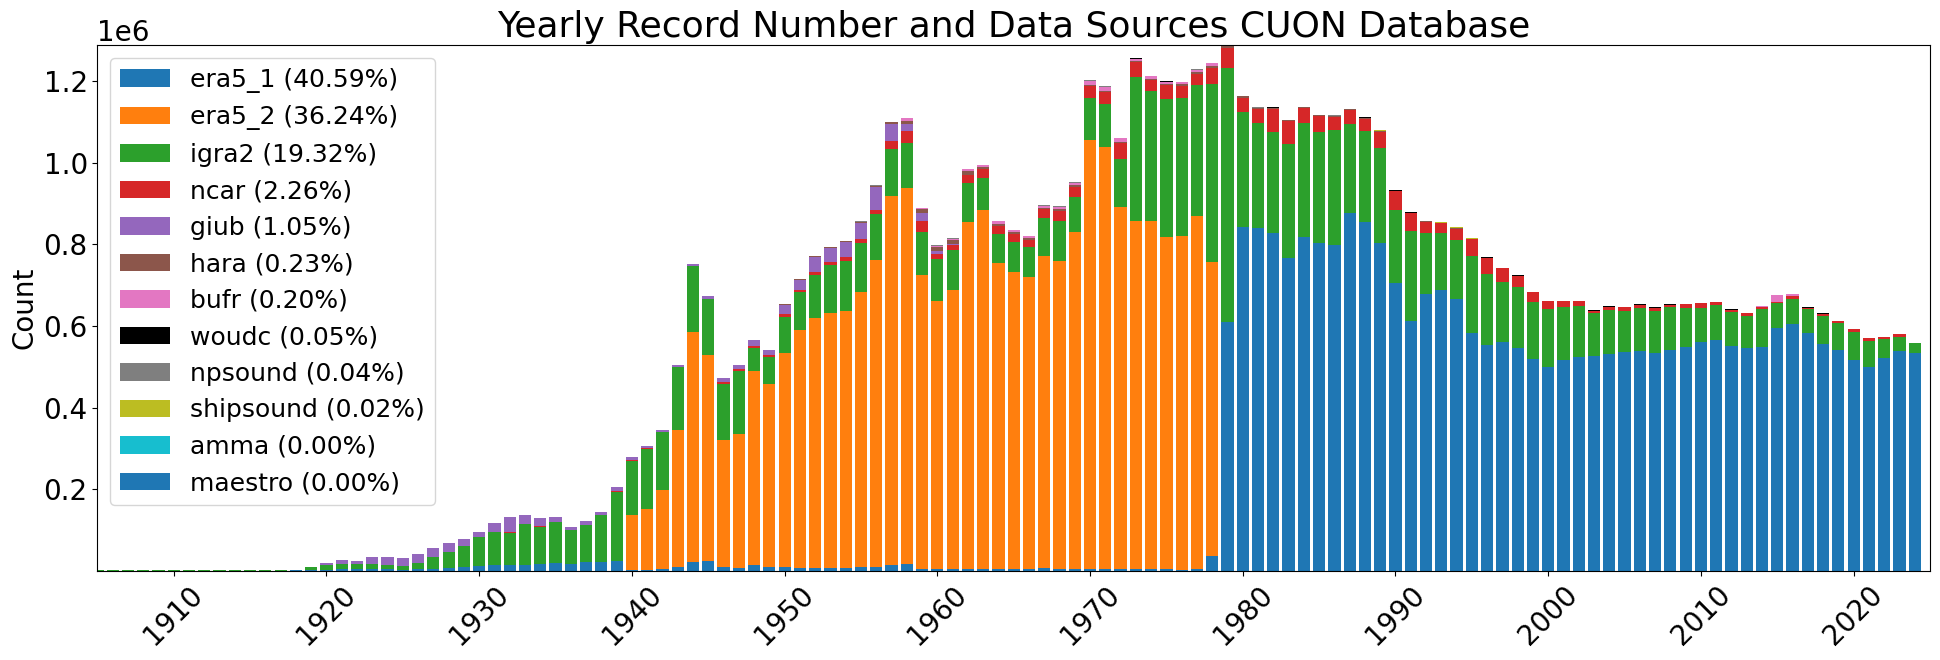

In [95]:
years = list(range(1900,2025,1))


# Calculate total sums per source
total_per_source = Counter()
for year_data in merged_data:
    total_per_source.update(year_data)

# Calculate absolute total for percentage calculation
absolute_total = sum(total_per_source.values())

# Calculate percentage and sort sources by highest percentage
sorted_sources = sorted(total_per_source.keys(), key=lambda src: total_per_source[src], reverse=True)
source_percentages = {src: (total_per_source[src] / absolute_total) * 100 for src in sorted_sources}

# Convert data to lists in the order of sorted sources
values = [[d.get(src, 0) for d in merged_data] for src in sorted_sources]

plt.rcParams.update({'font.size': 20})

# Stacked bar chart
x = np.arange(len(years))  # x-axis positions
fig, ax = plt.subplots(figsize=(19.8, 7))

bottom = np.zeros(len(years))  # Start from the bottom

# Plot each source as a stacked bar
bars = []
for source in sorted_sources:
    vals = [d.get(source, 0) for d in merged_data]
    if source == "woudc":
        bars.append(ax.bar(x, vals, label=source, bottom=bottom, color='black'))
    else:
        bars.append(ax.bar(x, vals, label=source, bottom=bottom))
    bottom += np.array(vals)  # Stack bars

# Formatting
# ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Yearly Record Number and Data Sources CUON Database", fontsize=26)

tick_indices = np.arange(0, len(years), 10)  # Indices for every 10th year
ax.set_xticks(tick_indices)
ax.set_xlim(5, 125)
ax.set_xticklabels([years[i] for i in tick_indices], rotation=45)

# Custom legend with sorted values including total count & percentage
legend_labels = [
    f"{src} ({source_percentages[src]:.2f}%)" # Total: {total_per_source[src]:,}, 
    for src in sorted_sources
]
ax.legend(bars, legend_labels, loc="upper left", fontsize=18) # title="Data Sources", 

plt.tight_layout()
plt.show()


In [33]:
merged_data

[Counter({np.str_('fixedgiub'): np.int64(7)}),
 Counter({np.str_('fixedgiub'): np.int64(17)}),
 Counter({np.str_('fixedgiub'): np.int64(13)}),
 Counter({np.str_('fixedgiub'): np.int64(12)}),
 Counter({np.str_('fixedgiub'): np.int64(377),
          np.str_('era5_1761'): np.int64(1)}),
 Counter({np.str_('igra2'): np.int64(325),
          np.str_('fixedgiub'): np.int64(210),
          np.str_('era5_1761'): np.int64(15)}),
 Counter({np.str_('igra2'): np.int64(435),
          np.str_('fixedgiub'): np.int64(199),
          np.str_('era5_1761'): np.int64(22)}),
 Counter({np.str_('igra2'): np.int64(446),
          np.str_('fixedgiub'): np.int64(181),
          np.str_('era5_1761'): np.int64(21)}),
 Counter({np.str_('igra2'): np.int64(560),
          np.str_('fixedgiub'): np.int64(531),
          np.str_('era5_1761'): np.int64(46)}),
 Counter({np.str_('igra2'): np.int64(802),
          np.str_('fixedgiub'): np.int64(510),
          np.str_('era5_1761'): np.int64(18)}),
 Counter({np.str_('igra2'

In [28]:
sc = glob.glob('/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/*extended.csv')

In [29]:
sc

['/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/bufr_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/era5_2_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/era5_3188_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/hara_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/ncar_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/bufr_cnr_orphans_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/woudc_station_configuration_extended.csv',
 '/srvfs/home/uvoggenberger/CEUAS/CEUAS/public/harvest/data/stati

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [31]:
coords = {}
for i in sc:
    if not ('orphan' in i) and not ('mobile' in i) and not ('CUON' in i) and not ('npsound' in i):
        df = pd.read_csv(i, sep='\t')
        coord = df[['latitude', 'longitude']].dropna()
        source = i.split('/')[-1].split('_station_configuration')[0]
        coords[source] = coord

In [32]:
new_coords = {}
ecmwf = []
bufr = []
for i in coords:
    if 'era5' in i:
        ecmwf.append(coords[i])
    elif 'bufr' in i:
        bufr.append(coords[i])
    else:
        new_coords[i] = coords[i]
new_coords['ecmwf'] = pd.concat(ecmwf)
new_coords['bufr'] = pd.concat(bufr)
new_coords = dict(sorted(new_coords.items()))


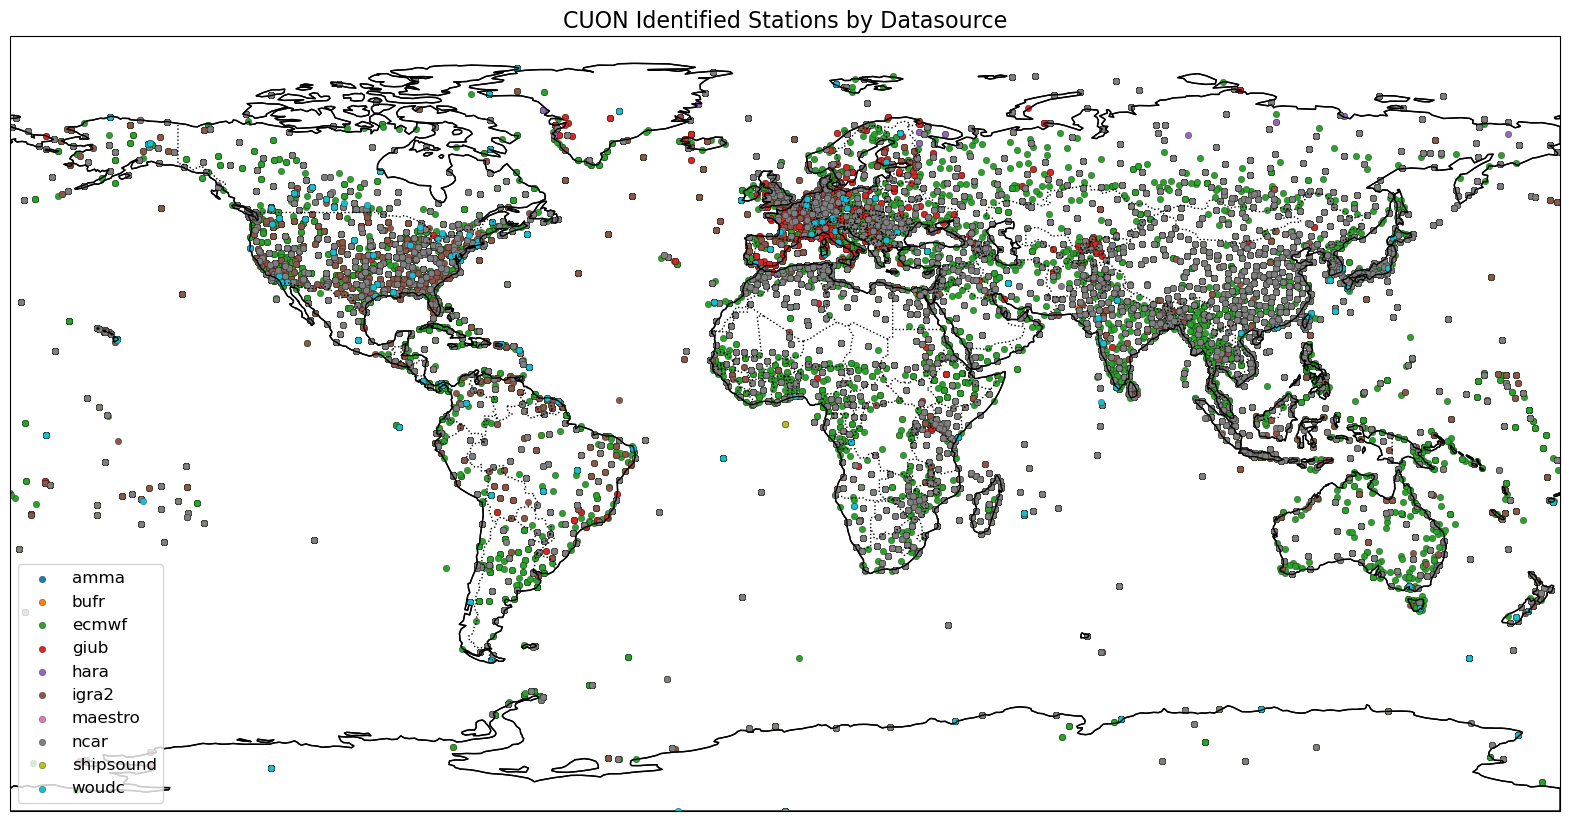

In [26]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Add land and coastline features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')


for i in new_coords:

    # Plot the points
    ax.scatter(new_coords[i]["longitude"], new_coords[i]["latitude"], s=22,  edgecolor='black', linewidth=0.2, transform=ccrs.PlateCarree(), label=i,)

# Set labels
ax.set_title("CUON Identified Stations by Datasource", fontsize=16)
ax.legend(loc='lower left', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# 